In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [4]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [5]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [8]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
100 * train.isnull().sum()/len(train)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [11]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [13]:
100 * test.isnull().sum()/len(test)

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [19]:
train.select_dtypes(include=['object']).shape[1]

7

In [24]:
train.select_dtypes(include=['float64', 'int64']).shape[1]

5

In [25]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [26]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


<AxesSubplot:xlabel='Item_Weight'>

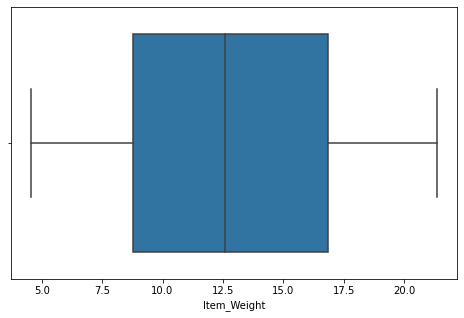

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight', data=train)

<AxesSubplot:xlabel='Item_Weight'>

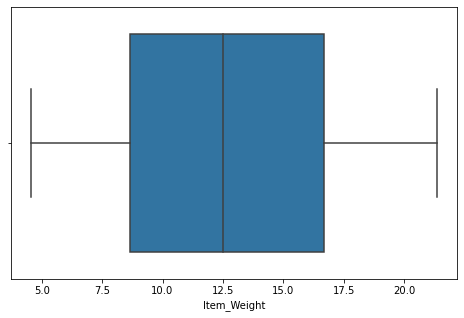

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight', data=test)

In [30]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [31]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [32]:
test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [33]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode())
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].mode())


In [34]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [36]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], ['Low Fat', 'Low Fat', 'Regular'])
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], ['Low Fat', 'Low Fat', 'Regular'])

In [37]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].astype(str) 


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

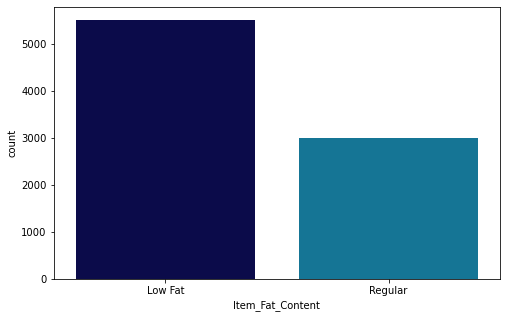

In [42]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content', data=train, palette='ocean')


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

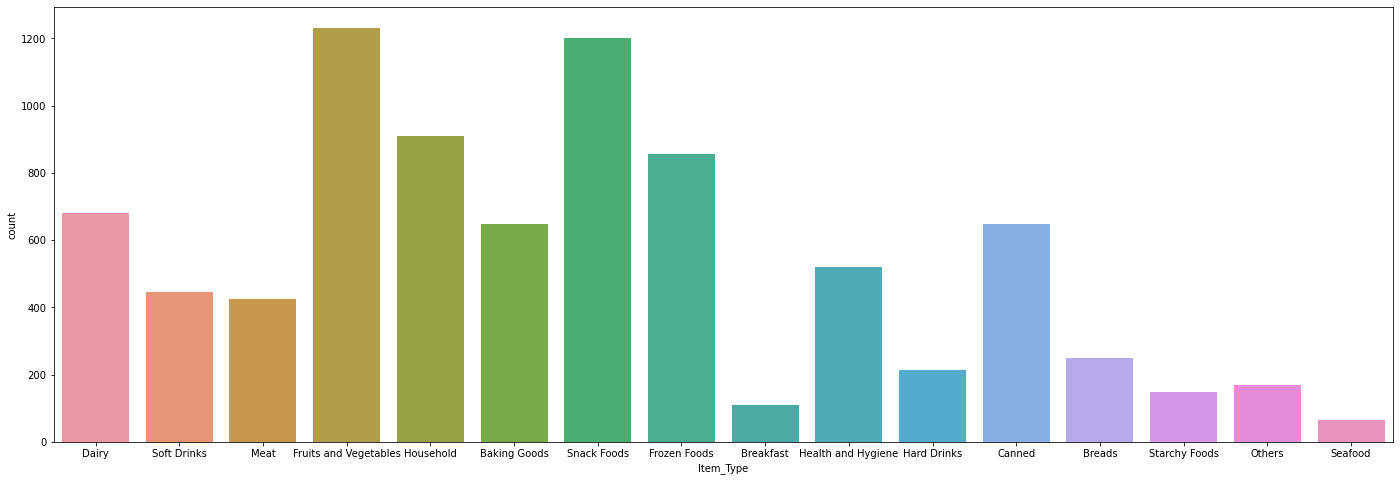

In [47]:
plt.figure(figsize=(24,8))
sns.countplot('Item_Type', data = train)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

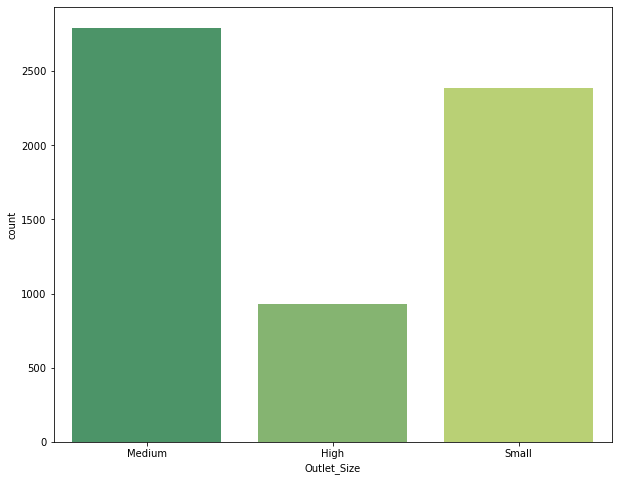

In [53]:
plt.figure(figsize=(10,8))
sns.countplot('Outlet_Size', data=train, palette='summer')

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

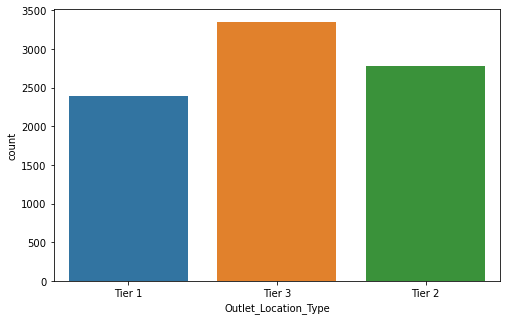

In [54]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type', data=train)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

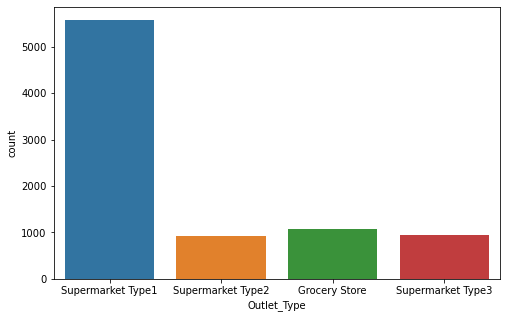

In [55]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type', data=train)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

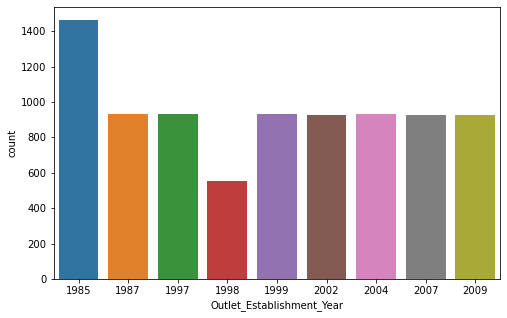

In [56]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Establishment_Year', data=train)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

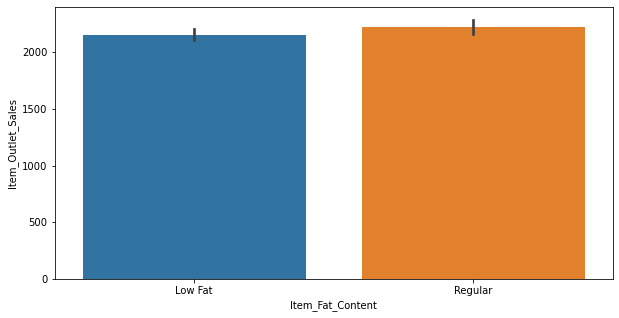

In [58]:
plt.figure(figsize=(10,5))
sns.barplot('Item_Fat_Content', 'Item_Outlet_Sales', data=train)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

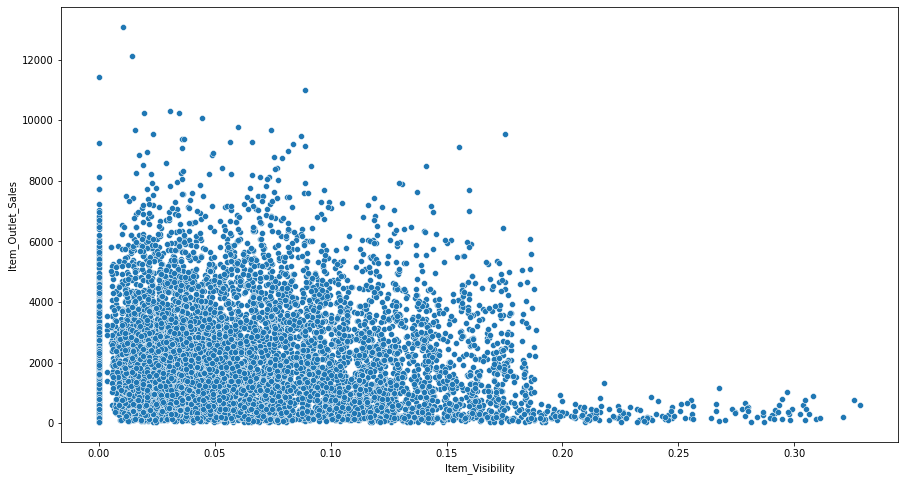

In [61]:
plt.figure(figsize=(15,8))
sns.scatterplot('Item_Visibility', 'Item_Outlet_Sales', data=train)

In [62]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0, train['Item_Visibility'].mean())
test['Item_Visibility'] = test['Item_Visibility'].replace(0, test['Item_Visibility'].mean())

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

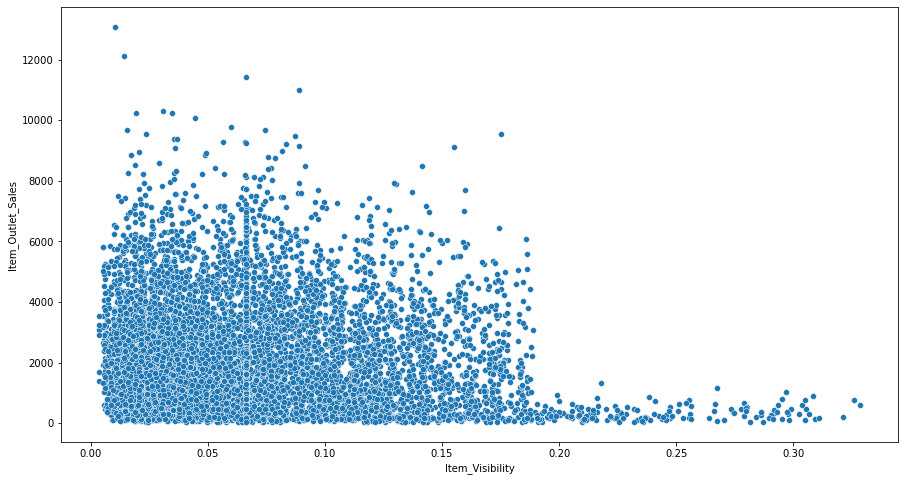

In [65]:
plt.figure(figsize=(15,8))
sns.scatterplot('Item_Visibility', 'Item_Outlet_Sales', data=train)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

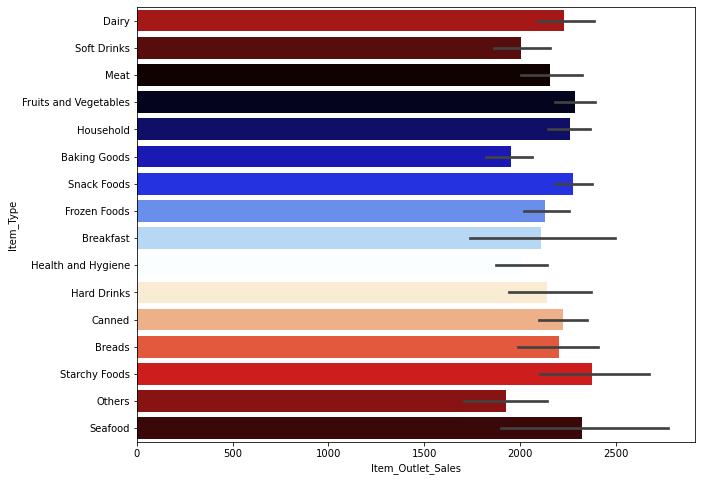

In [68]:
plt.figure(figsize=(10,8))
sns.barplot('Item_Outlet_Sales', 'Item_Type', data=train, palette='flag')

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

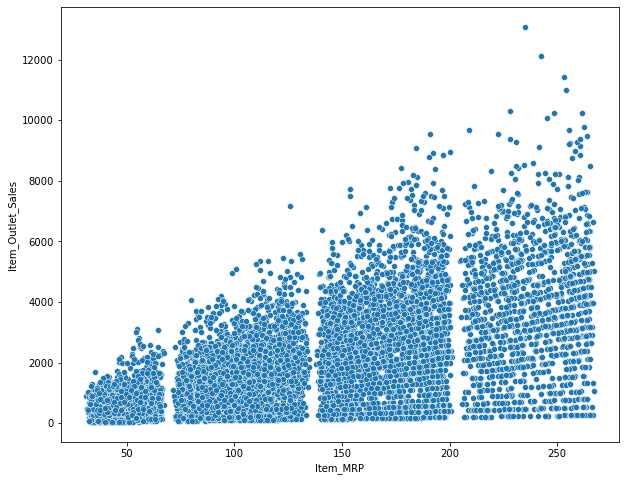

In [70]:
plt.figure(figsize=(10,8))
sns.scatterplot('Item_MRP', 'Item_Outlet_Sales', data=train)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

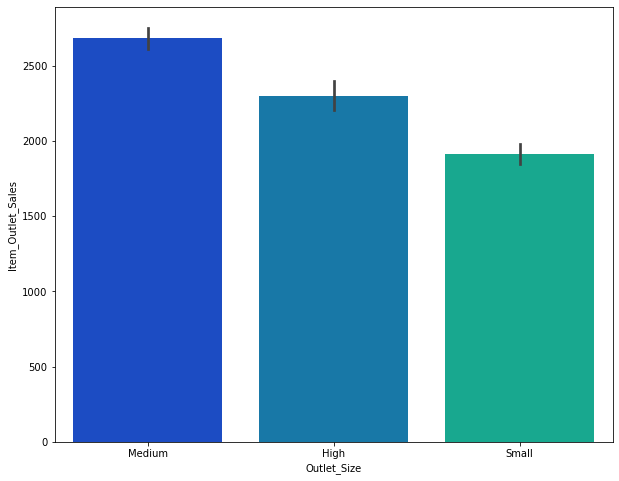

In [72]:
plt.figure(figsize=(10,8))
sns.barplot('Outlet_Size', 'Item_Outlet_Sales', data=train, palette='winter')

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

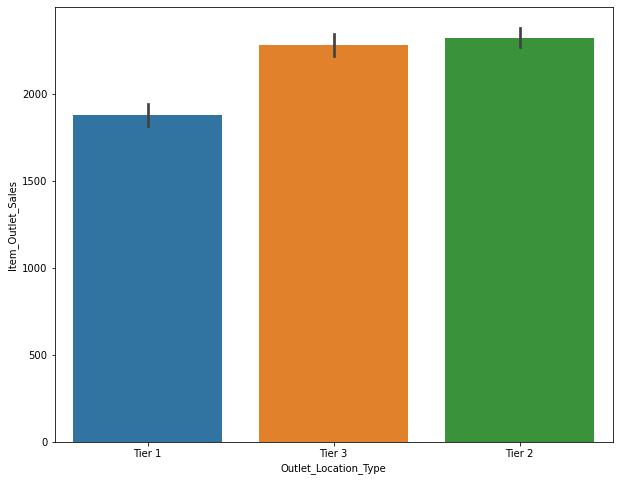

In [73]:
plt.figure(figsize=(10,8))
sns.barplot('Outlet_Location_Type', 'Item_Outlet_Sales', data=train)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

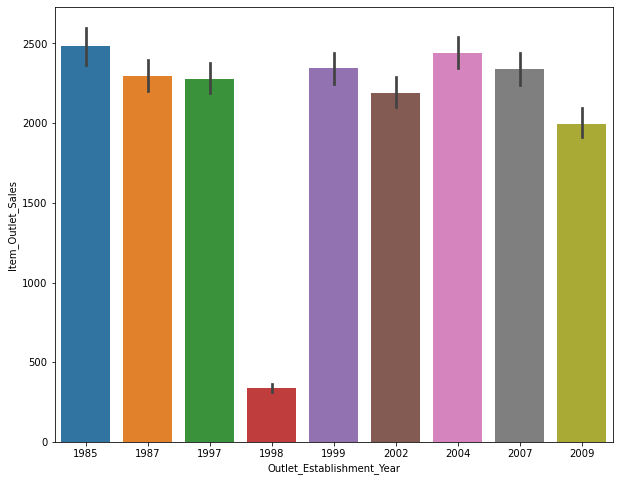

In [75]:
plt.figure(figsize=(10,8))
sns.barplot('Outlet_Establishment_Year', 'Item_Outlet_Sales', data=train)

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

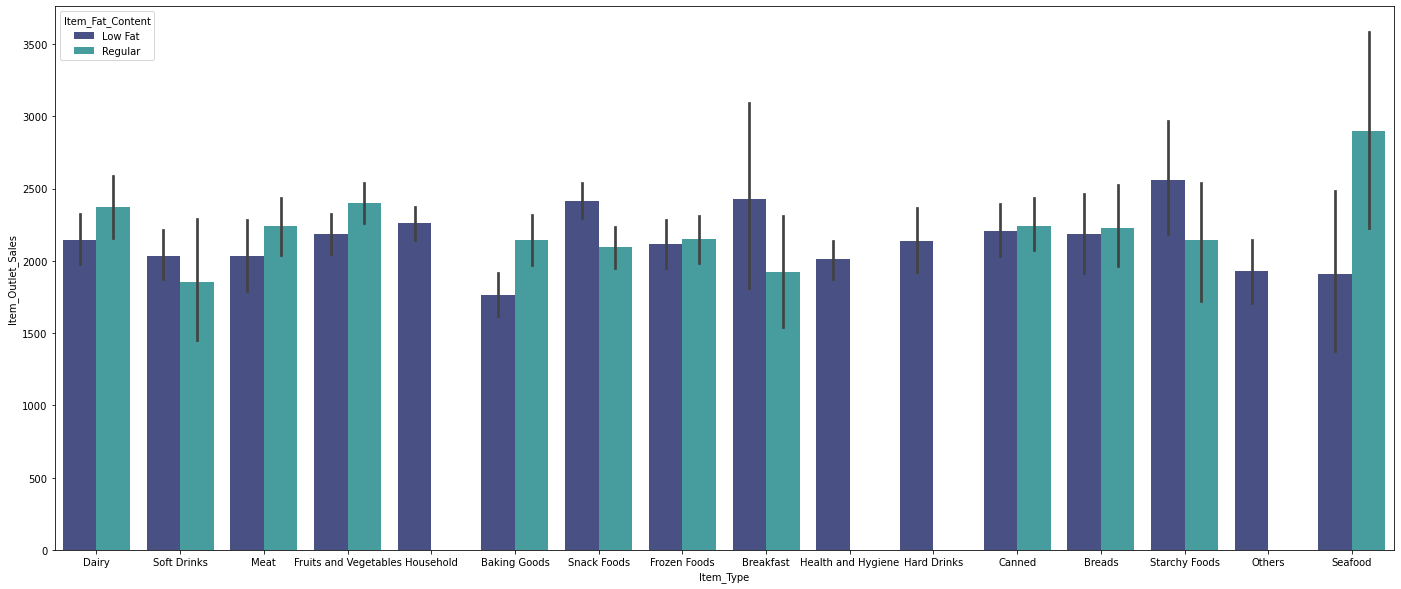

In [78]:
plt.figure(figsize=(24,10))
sns.barplot('Item_Type', 'Item_Outlet_Sales', hue='Item_Fat_Content', data=train, palette='mako')

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

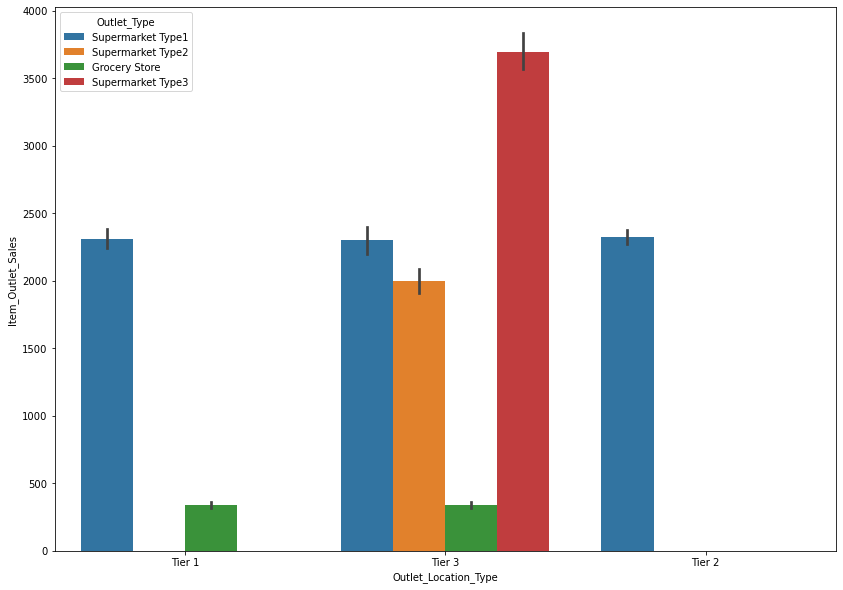

In [80]:
plt.figure(figsize=(14,10))
sns.barplot('Outlet_Location_Type', 'Item_Outlet_Sales', hue='Outlet_Type', data=train)

In [81]:
le = LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

for i in var_mod:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])
    
  

In [82]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.066132,6,182.0950,OUT010,1998,3,2,0,732.3800
4,NCD19,8.93,0,0.066132,9,53.8614,OUT013,1987,0,2,1,994.7052


In [83]:
train = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], axis = 1)
test = test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], axis = 1)

In [90]:
alt_train = pd.read_csv('Train.csv')
train['Years_Established'] = alt_train['Outlet_Establishment_Year'].apply(lambda x: 2022 - x)

In [91]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380,23
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228,13
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700,23
3,19.20,1,0.066132,6,182.0950,3,2,0,732.3800,24
4,8.93,0,0.066132,9,53.8614,0,2,1,994.7052,35


In [92]:
X= train[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']]
y= train['Item_Outlet_Sales']

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=22)

In [94]:
features= ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']

In [96]:
LR = LinearRegression(normalize=True)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
coef2 = pd.Series(LR.coef_, features).sort_values()

In [97]:
coef2


Item_Visibility        -2128.253081
Outlet_Location_Type    -267.720978
Item_Weight               -0.148728
Item_Type                  1.546093
Years_Established          2.440584
Outlet_Size                3.232725
Item_MRP                  15.604557
Item_Fat_Content          37.795553
Outlet_Type              972.754748
dtype: float64

<AxesSubplot:>

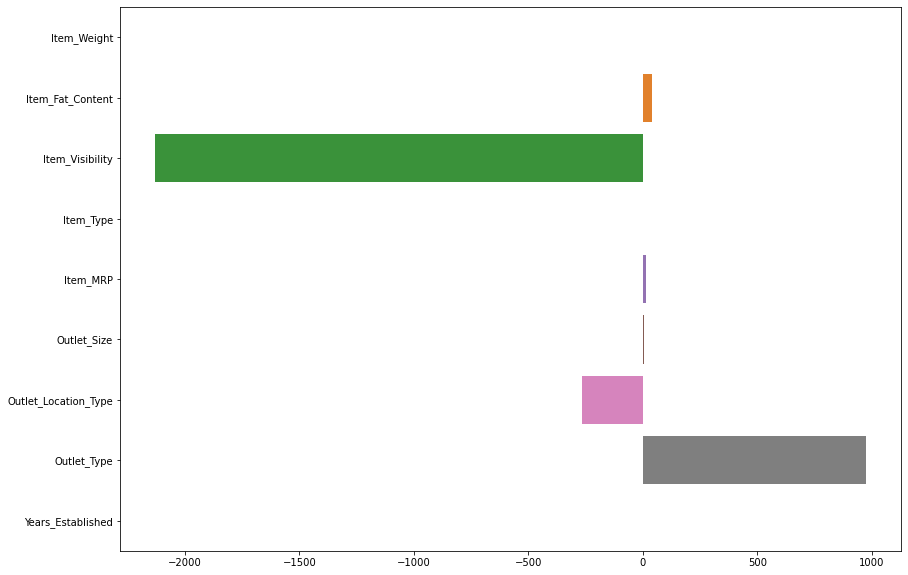

In [99]:
plt.figure(figsize=(14,10))
sns.barplot(LR.coef_, features)

In [100]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
R2

0.48795418484741104

In [101]:
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)

In [103]:
print(f'MAE = {MAE}, MSE = {MSE}')

MAE = 939.8534649246965, MSE = 1582387.4173280632


In [105]:
from math import sqrt
rmse = sqrt(MSE)
rmse

1257.9298141502422

In [110]:
RF = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=4, random_state=22)

RF.fit(X_train,y_train)
       
y_pred = RF.predict(X_test)

In [112]:
coef3 = pd.Series(RF.feature_importances_, features).sort_values(ascending=False)
coef3

Item_MRP                0.543245
Outlet_Type             0.397734
Years_Established       0.056371
Item_Visibility         0.001669
Item_Type               0.000746
Item_Weight             0.000169
Item_Fat_Content        0.000046
Outlet_Size             0.000017
Outlet_Location_Type    0.000002
dtype: float64

<AxesSubplot:>

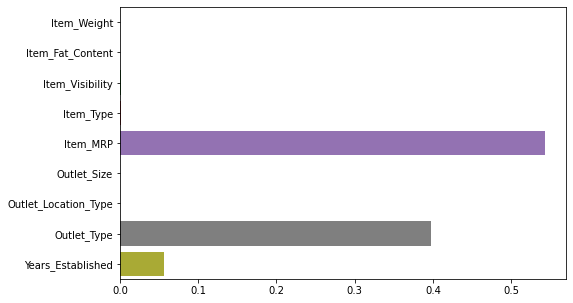

In [114]:
plt.figure(figsize=(8,5))
sns.barplot(RF.feature_importances_, features)

In [115]:
def cross_val(model_name, model, X, y, cv):
    scores = cross_val_score(model, X, y, cv=cv)
    print(f'{model_name} Scores: ')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),2)}')    

In [117]:
cross_val(RF, LinearRegression(), X, y, 5)

RandomForestRegressor(max_depth=5, min_samples_leaf=4, n_estimators=200,
                      random_state=22) Scores: 
0.51
0.5
0.48
0.5
0.5
Average RandomForestRegressor(max_depth=5, min_samples_leaf=4, n_estimators=200,
                      random_state=22) score: 0.5


In [118]:
cross_val(RF, RandomForestRegressor(), X, y, 5)

RandomForestRegressor(max_depth=5, min_samples_leaf=4, n_estimators=200,
                      random_state=22) Scores: 
0.57
0.52
0.52
0.55
0.57
Average RandomForestRegressor(max_depth=5, min_samples_leaf=4, n_estimators=200,
                      random_state=22) score: 0.55
